In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
icea = np.loadtxt("iceareayear1new.out")
iceh = np.loadtxt("icethiyear1new.out")
PE = np.loadtxt("resultrainsnow.out")
premean = np.nanmean(PE)
eva = np.loadtxt("resoatotaleva222.out")
evamean = np.nanmean(eva)

#SSS = np.loadtxt("dmeanSSSnew.out")
SSS = np.loadtxt("SSSnew350.out")
SSSmean = np.nanmean(SSS)

#SFWF = np.loadtxt("resultSFWF.out")
dvi = np.loadtxt("dvirr2new.out")

In [3]:
eva.shape

(350,)

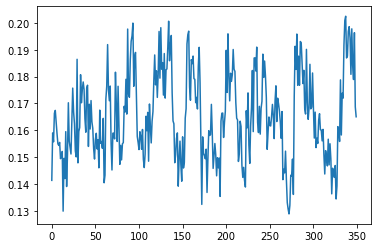

In [4]:
d4 = PE.reshape(350,12)
dmean = np.nanmean(d4,axis=1)
plt.plot(dmean)
pre = np.convolve(dmean, np.ones((5,))/5, mode='valid')
#SSS = np.convolve(SSS, np.ones((5,))/5, mode='valid')

In [5]:
try2 = np.convolve((dmean+eva-dvi)*10, np.ones((5,))/5, mode='valid')

In [6]:
ar = icea[0:346]
hi = iceh[0:346]

In [7]:
wspxx = np.loadtxt("wspxx2.out")
mrpxx = np.loadtxt("mrpxx2.out")
#arpxx = np.loadtxt("arpxx2.out")
t = np.arange(2,348,1)

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


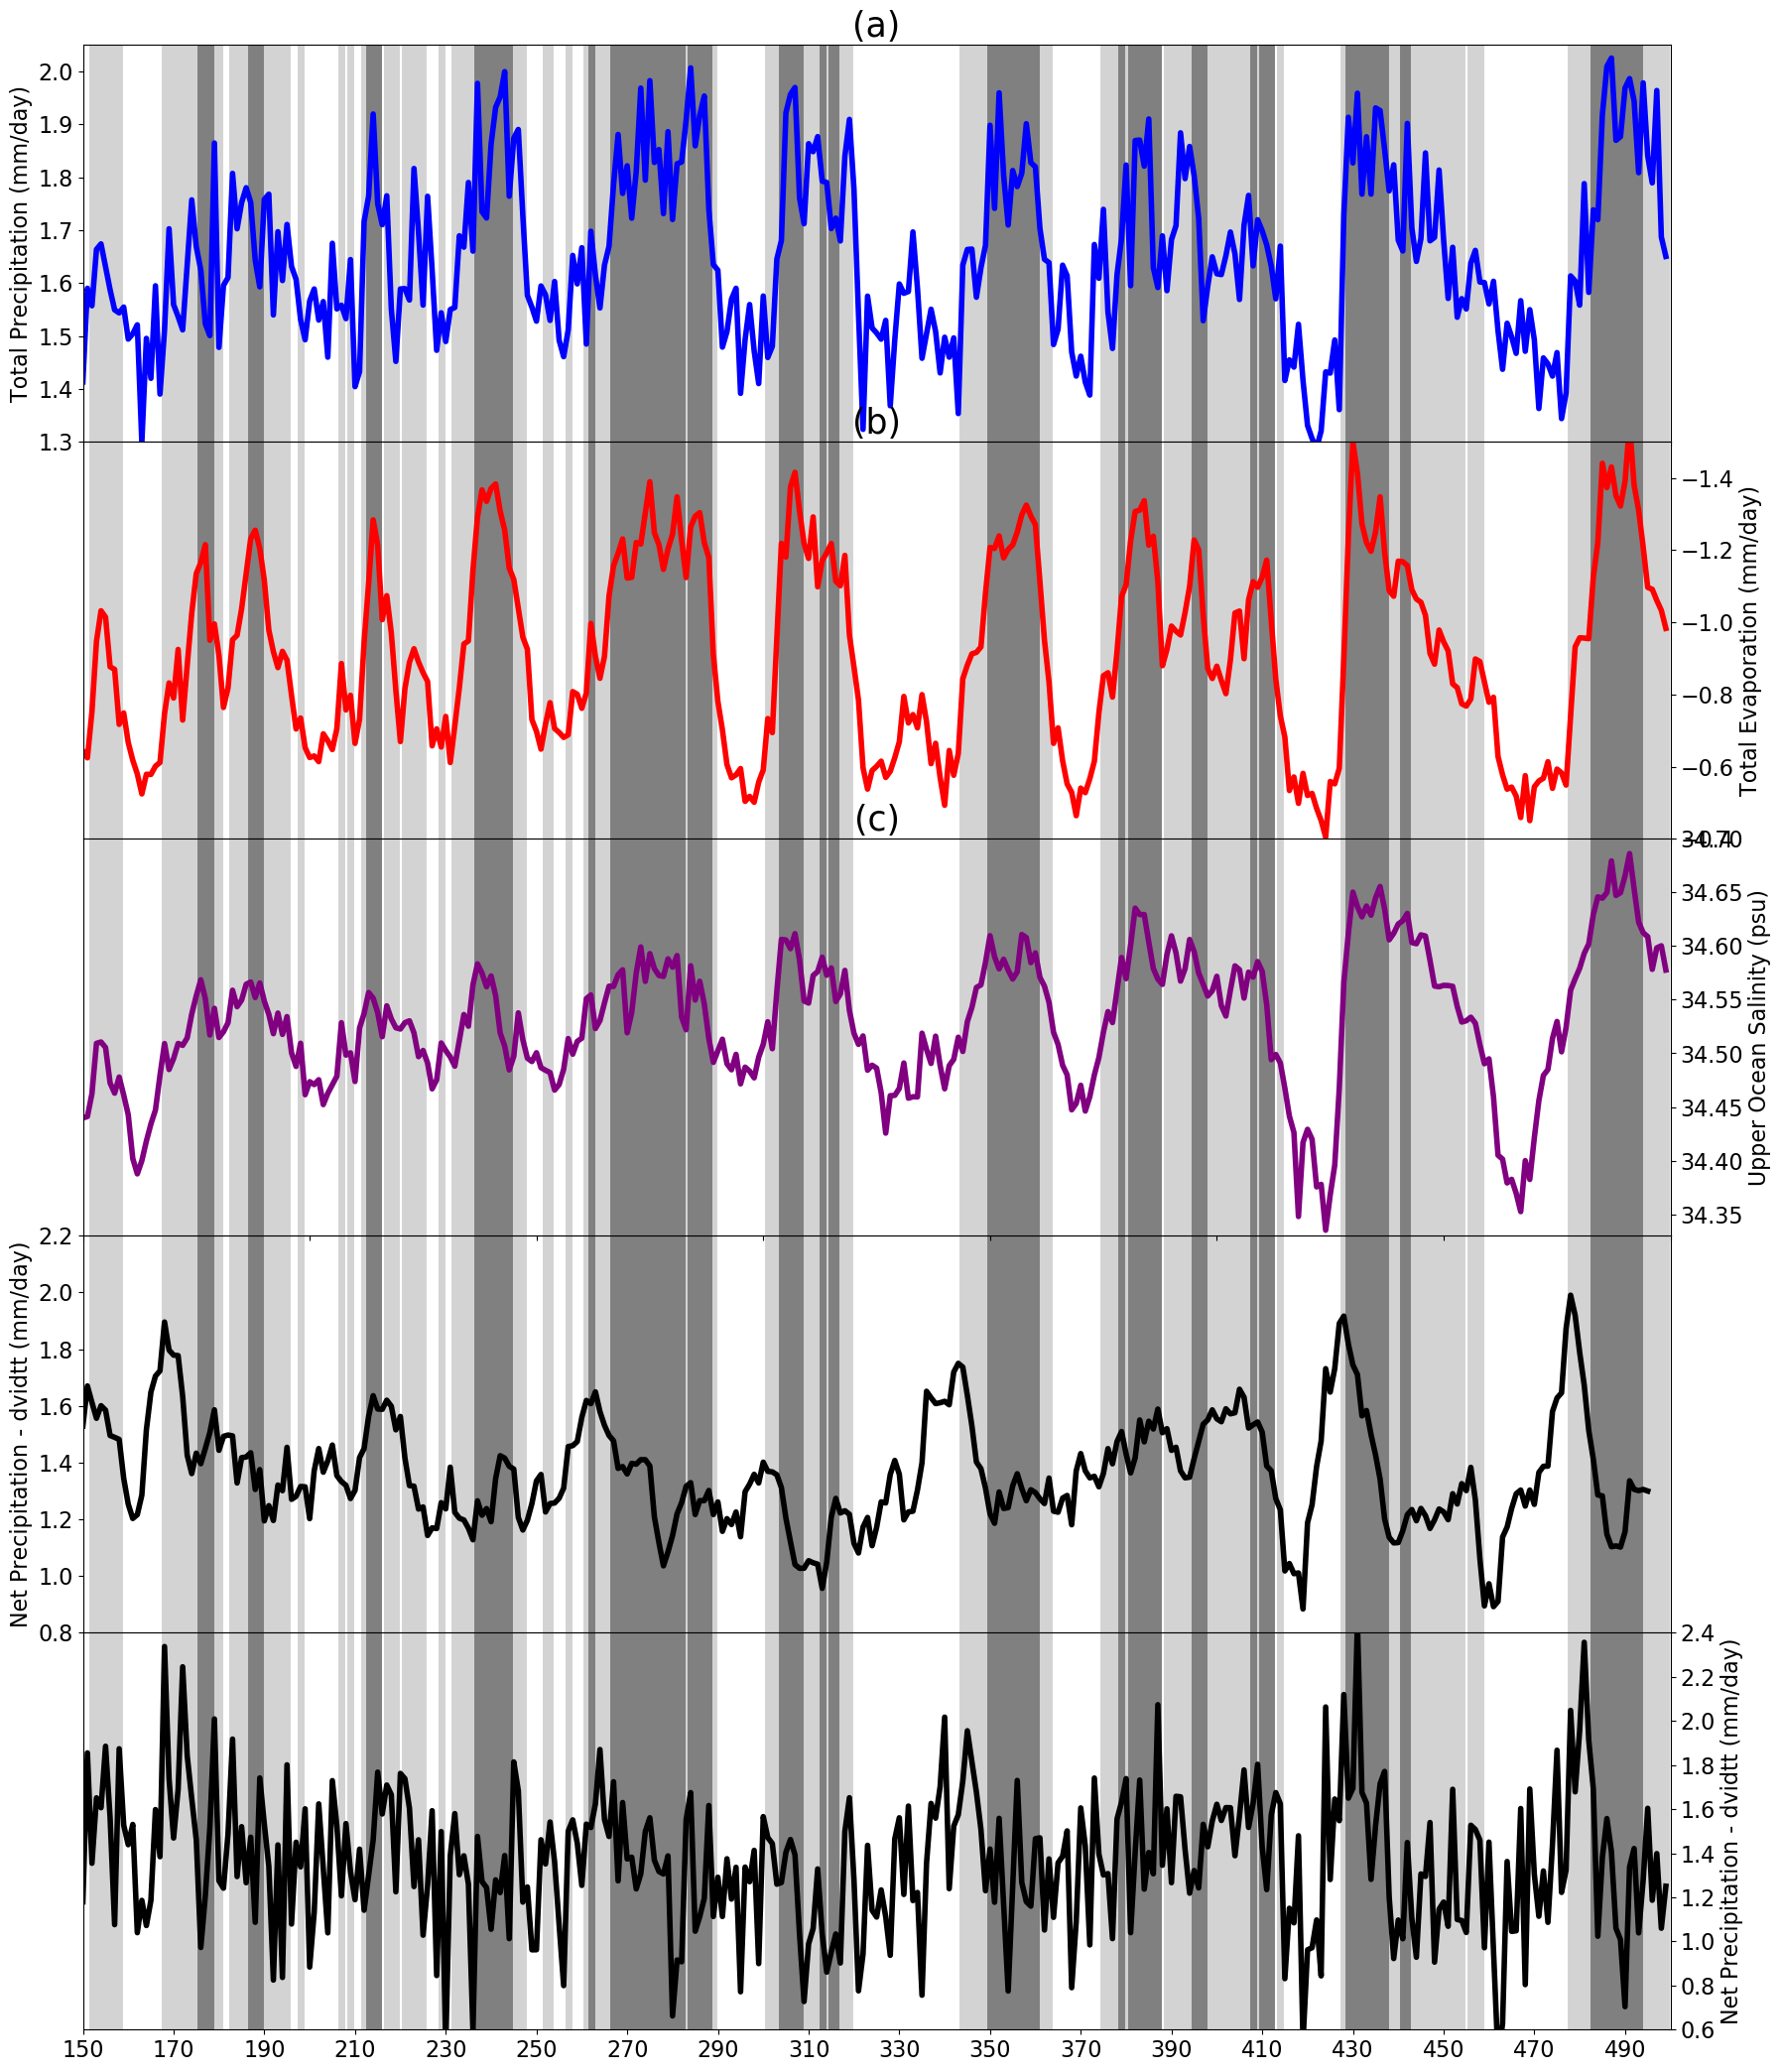

In [8]:
#t = np.arange(0,4176,12)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,20), dpi=100)
################################################################
################################################################
t = np.arange(2,348,1)
ax1 = fig.add_axes([0.1, 0.9, 0.8, 0.2],
                    xticklabels=[],ylim=(1.3,2.0))

ax1.plot(dmean*10,'blue',linewidth=4)

#ax1.fill_between(t,premean,pre,where=pre < premean,facecolor='purple', alpha=1)
#plt.hlines(premean*3600*24*100/997, 0, 350, colors = "blue",linestyles = "dashed")
#plt.vlines(arpxx, premean*3600*24*100/997, 0.000024*3600*24*100/997, colors = "lightgrey",linewidth=5)
plt.vlines(mrpxx, 1.3,2.05, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, 1.3,2.05, colors = "grey",linewidth=5)
plt.ylabel('Total Precipitation (mm/day)',**my_font)
plt.axis("tight")

plt.title('(a)', fontsize=25)

ax1.set(ylim=(1.3,2.05),xlim=(0, 350))
ax = plt.gca()
#ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax.yaxis.get_offset_text().set_fontsize(16)
plt.yticks(**my_font)
#############################

###########################################
ax2 = fig.add_axes([0.1, 0.7, 0.8, 0.2],
                   xticklabels=[],ylim=(-0.4, -1.4))

ax2.plot(eva*10,'red',linewidth=4)
#ax2.fill_between(t,evamean,eva,where=eva > evamean,facecolor='red', alpha=1)
#plt.hlines(evamean*3600*24*100/997, 0, 350, colors = "red",linestyles = "dashed")
#plt.vlines(arpxx, evamean*3600*24*100/997, -0.000018*3600*24*100/997,colors = "lightgrey",linewidth=5)
plt.vlines(mrpxx, -0.4, -1.5, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx,-0.4, -1.5, colors = "grey",linewidth=5)
plt.ylabel('Total Evaporation (mm/day)',**my_font)
#plt.axis("tight")
ax2 = plt.gca()
#ax2.yaxis.get_major_formatter().set_powerlimits((0,1))
ax2.set(ylim=(-0.4, -1.5),xlim=(0, 350))
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')
plt.title('(b)', fontsize=25)
ax = plt.gca()
#ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax.yaxis.get_offset_text().set_fontsize(16)
plt.yticks(**my_font)
################################################################
#####################################################################
ax5 = fig.add_axes([0.1, 0.3, 0.8, 0.2],
                  xticklabels=[])

ax5.plot(try2,'black',linewidth=4)
#plt.vlines(arpxx, 0,1.6, colors = "lightgrey",linewidth=5)
plt.vlines(mrpxx, 0.8,2.2, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, 0.8,2.2, colors = "grey",linewidth=5)
#plt.hlines(0.6, 0, 350, colors = "purple",linestyles = "dashed")
plt.ylabel('Net Precipitation - dvidtt (mm/day)',**my_font)
#plt.axis("tight")
ax5.set(ylim=(0.8,2.2),xlim=(0, 350))

plt.yticks(**my_font)
#plt.title('(c)', fontsize=25)
#plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490'],**my_font)

#########################
ax4 = fig.add_axes([0.1, 0.5, 0.8, 0.2],
                   xticklabels=[])

ax4.plot(SSS,'purple',linewidth=4)
#plt.hlines(SSSmean, 0, 350, colors = "purple",linestyles = "dashed")
#ax3.fill_between(t,SSSmean,SSS,where=SSS < SSSmean,facecolor='green', alpha=1)
plt.yticks(**my_font)
#plt.vlines(arpxx, SSSmean, 34.6, colors = "lightgrey",linewidth=5)
plt.vlines(mrpxx, 34.33, 34.7, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, 34.33, 34.7, colors = "grey",linewidth=5)
plt.ylabel('Upper Ocean Salinity (psu)',color= 'black',**my_font)
plt.axis("tight")
ax4.set(ylim=(34.33, 34.7,),xlim=(0, 350)) 
ax4.yaxis.set_label_position('right')
ax4.yaxis.set_ticks_position('right')
plt.yticks(**my_font)
plt.title('(c)', fontsize=25)
#########################
#ax5 = fig.add_axes([0.1, 0.1, 0.8, 0.2],
#                   xticklabels=[])

#ax5.plot(t,SFWF*3600*24*100/997*10,'k',linewidth=4)
#ax5.plot(SFWF,'k',linewidth=4)
#plt.hlines(SSSmean, 0, 350, colors = "purple",linestyles = "dashed")
#ax3.fill_between(t,SSSmean,SSS,where=SSS < SSSmean,facecolor='green', alpha=1)
#plt.yticks(**my_font)
#plt.vlines(arpxx, SSSmean, 34.6, colors = "lightgrey",linewidth=5)
#plt.vlines(mrpxx, 1,2.2, colors = "lightgrey",linewidth=5)
#plt.vlines(wspxx,  1,2.2, colors = "grey",linewidth=5)
#plt.ylabel('Virtual Salt Flux (mm/day)',color= 'black',**my_font)
#plt.axis("tight")
#ax5.set(ylim=( 1,2.2),xlim=(0, 350)) 
#ax5.set(xlim=(0, 350)) 
#ax4.yaxis.set_label_position('right')
#ax4.yaxis.set_ticks_position('right')
#plt.title('(e)', fontsize=25)


#plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490'],**my_font)
plt.xticks(**my_font)

ax6 = fig.add_axes([0.1, 0.1, 0.8, 0.2],
                  xticklabels=[])

ax6.plot((dmean+eva-dvi)*10,'black',linewidth=4)
#plt.vlines(arpxx, 0,1.6, colors = "lightgrey",linewidth=5)
plt.vlines(mrpxx, 0.6,2.4, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, 0.6,2.4, colors = "grey",linewidth=5)
#plt.hlines(0.6, 0, 350, colors = "purple",linestyles = "dashed")
plt.ylabel('Net Precipitation - dvidtt (mm/day)',**my_font)
#plt.axis("tight")
ax6.set(ylim=(0.6,2.4),xlim=(0, 350))
ax6.yaxis.set_label_position('right')
ax6.yaxis.set_ticks_position('right')
plt.yticks(**my_font)
#plt.title('(c)', fontsize=25)
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490'],**my_font)

plt.savefig("PESallinonetry.png",bbox_inches='tight',dpi=fig.dpi)

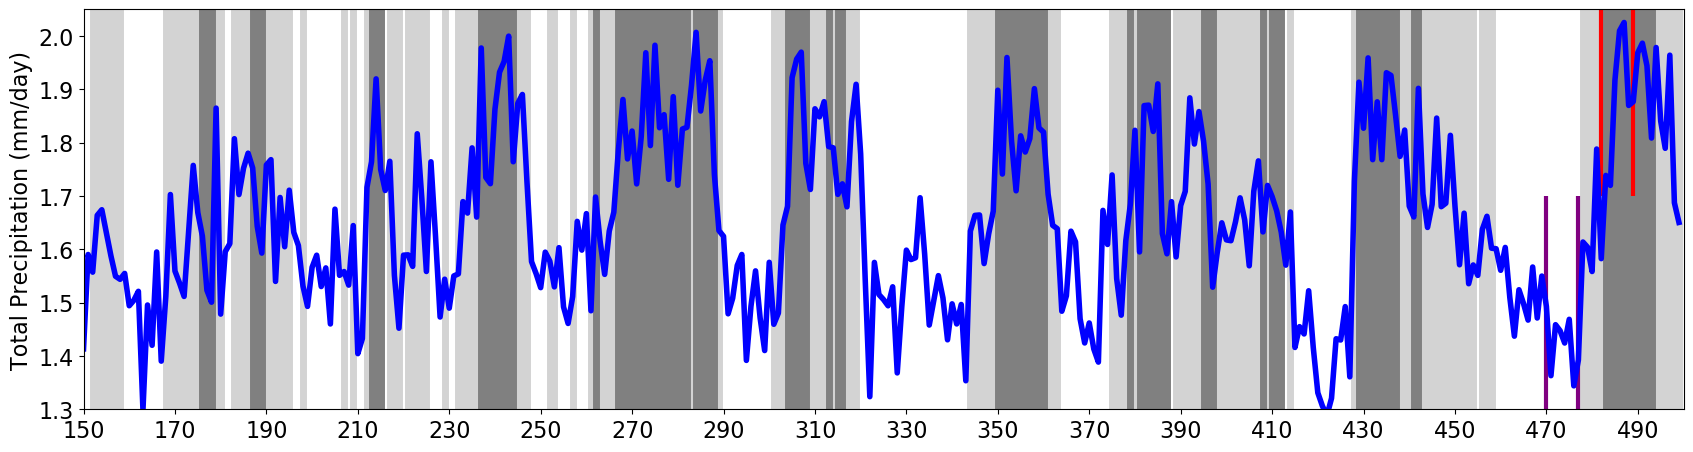

In [16]:
#t = np.arange(0,4176,12)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,20), dpi=100)
################################################################
################################################################
t = np.arange(2,348,1)
ax1 = fig.add_axes([0.1, 0.9, 0.8, 0.2],
                    xticklabels=[],ylim=(1.3,2.0))

ax1.plot(dmean*10,'blue',linewidth=4)

#ax1.fill_between(t,premean,pre,where=pre < premean,facecolor='purple', alpha=1)
#plt.hlines(premean*3600*24*100/997, 0, 350, colors = "blue",linestyles = "dashed")
#plt.vlines(arpxx, premean*3600*24*100/997, 0.000024*3600*24*100/997, colors = "lightgrey",linewidth=5)
plt.vlines(mrpxx, 1.3,2.05, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, 1.3,2.05, colors = "grey",linewidth=5)
plt.ylabel('Total Precipitation (mm/day)',**my_font)
plt.axis("tight")

#plt.title('(a)', fontsize=25)
plt.vlines(332, 1.7,2.05, colors = "red",linewidth=3)
plt.vlines(339, 1.7,2.05, colors = "red",linewidth=3)

plt.vlines(320, 1.3,1.7, colors = "purple",linewidth=3)
plt.vlines(327, 1.3,1.7, colors = "purple",linewidth=3)
ax1.set(ylim=(1.3,2.05),xlim=(0, 350))
ax = plt.gca()
#ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax.yaxis.get_offset_text().set_fontsize(16)
plt.yticks(**my_font)
#############################
#plt.title('(c)', fontsize=25)
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490'],**my_font)

plt.savefig("PESallinonetry.png",bbox_inches='tight',dpi=fig.dpi)